In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 



In [2]:
colnames = ['age','workclass','fnlwgt','education','education-num','marial-status','occupation','relationship','race',
           'sex','capital-gain','capital-loss','hous-per-week','native-country','income']
df = pd.read_csv('adult.data',sep=",",names=colnames)
df

,age,workclass,fnlwgt,education,education-num,marial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hous-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hous-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.dropna(inplace=True)
df.shape

(32561, 15)

# Remove Rows including '?' and Striping Target String

In [7]:
#striping all strings
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

#remove rows includes question marks
df = df[~df.workclass.str.startswith('?')]
df = df[~df['education'].str.startswith('?')]
df = df[~df['marial-status'].str.startswith('?')]
df = df[~df['occupation'].str.startswith('?')]
df = df[~df['relationship'].str.startswith('?')]
df = df[~df['race'].str.startswith('?')]
df = df[~df['sex'].str.startswith('?')]
df = df[~df['native-country'].str.startswith('?')]

df.shape


(30162, 15)

# Dataset is too big. We will only use 3000 samples out of 30162

That is not a great idea, but we want to show different techniques, but our processor and ram is not that powerful, sooo...

In [8]:
np.random.seed(0)

In [9]:
permutation = np.random.permutation(df.shape[0])
indexes = permutation[:3000]

df = df.iloc[indexes,:]
df.shape

(3000, 15)

In [10]:
X = df.drop('income',axis=1)
y = df['income']



# String are converted to binaries where <=50k equal to 0 

In [11]:
y = np.where(y =='<=50K',0,1)

# see if there is any exception
assert X.shape[0] == sum(y==0) + sum(y==1)

In [12]:
y

array([0, 0, 0, ..., 0, 0, 0])

# Categorical Variables

In [13]:
workclass_dummy = pd.get_dummies(X.workclass,prefix='workclass')
education_dummy = pd.get_dummies(X.education,prefix='education')
marial_dummy = pd.get_dummies(X['marial-status'],prefix='marial')
occupation_dummy = pd.get_dummies(X.occupation,prefix='occupation')
relationship_dummy = pd.get_dummies(X.relationship,prefix='relationship')
race_dummy = pd.get_dummies(X.race,prefix='race')
sex_dummy = pd.get_dummies(X.sex,prefix='sex')
native_dummy = pd.get_dummies(X['native-country'],prefix='native')

workclass_dummy.shape,education_dummy.shape,marial_dummy.shape,occupation_dummy.shape,relationship_dummy.shape,race_dummy.shape,sex_dummy.shape,native_dummy.shape

((3000, 7),
 (3000, 16),
 (3000, 6),
 (3000, 13),
 (3000, 6),
 (3000, 5),
 (3000, 2),
 (3000, 37))

# Dummy Variable Trap Prevented (drop last column)

In [14]:
workclass_dummy = workclass_dummy.iloc[:,:-1]
education_dummy = education_dummy.iloc[:,:-1]
marial_dummy = marial_dummy.iloc[:,:-1]
occupation_dummy = occupation_dummy.iloc[:,:-1]
relationship_dummy = relationship_dummy.iloc[:,:-1]
race_dummy = race_dummy.iloc[:,:-1]
sex_dummy = sex_dummy.iloc[:,:-1]
native_dummy = native_dummy.iloc[:,:-1]

workclass_dummy.shape,education_dummy.shape,marial_dummy.shape,occupation_dummy.shape,relationship_dummy.shape,race_dummy.shape,sex_dummy.shape,native_dummy.shape

((3000, 6),
 (3000, 15),
 (3000, 5),
 (3000, 12),
 (3000, 5),
 (3000, 4),
 (3000, 1),
 (3000, 36))

# Merge Them

In [15]:
X = X.drop(['workclass','education','marial-status','occupation','relationship','race','sex','native-country'],axis=1)
X = pd.concat([X,workclass_dummy,education_dummy,marial_dummy,occupation_dummy,relationship_dummy,\
              race_dummy,sex_dummy,native_dummy],axis=1)
X


,age,fnlwgt,education-num,capital-gain,capital-loss,hous-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native_Philippines,native_Poland,native_Portugal,native_Puerto-Rico,native_South,native_Taiwan,native_Thailand,native_Trinadad&Tobago,native_United-States,native_Vietnam
2135,44,81853,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
15639,21,306114,10,0,0,20,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
29059,36,186110,10,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
27523,30,45427,11,0,0,49,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9280,42,133584,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25737,35,95455,13,0,0,55,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22324,27,52028,13,0,0,40,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1768,71,105200,9,6767,0,20,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
27369,28,209934,3,0,0,25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2400, 90), (600, 90), (2400,), (600,))

# Logistic Regression

# L2 regularization CV

lbfgs is default solver

In [18]:

C_param_range = [0.001,0.01,0.1,1,10,100,1000,10000]
scoresCV = []
for c in C_param_range:
    logreg = LogisticRegression(C=c,penalty='l2',max_iter=1000,solver='lbfgs')
    logreg.fit(X_train, y_train)    
    scoreCV = cross_val_score(logreg, X_train, y_train,scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
    scoresCV.append([c,np.mean(scoreCV)])


In [19]:
df = pd.DataFrame(scoresCV,columns=['C value (1/lambda)','Validation Accuracy'])
df

,C value (1/lambda),Validation Accuracy
0,0.001,0.794583
1,0.010,0.833333
2,0.100,0.843750
3,1.000,0.845000
4,10.000,0.844167
5,100.000,0.843750
6,1000.000,0.843333
7,10000.000,0.843333


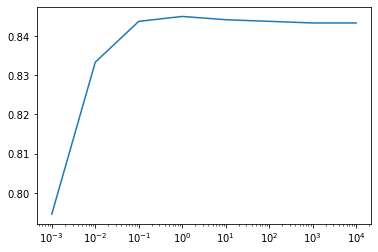

In [17]:
ax = plt.gca()
ax.plot(df.iloc[:,0].values,df.iloc[:,1].values)
ax.set_xscale('log')

1 C value is selected

In [18]:
logreg = LogisticRegression(C=1,penalty='l2',max_iter=1000)
logreg.fit(X_train, y_train)
score = logreg.score(X_test, y_test)
print(score)

0.8333333333333334


In [19]:
X_columns = X.columns
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logreg.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":X_columns,"Coefficients":np.transpose(logreg.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

                 Variables  Coefficients
0                Intercept     -2.118251
1                      age      0.237189
2                   fnlwgt      0.141703
3            education-num      0.416662
4             capital-gain      2.321800
..                     ...           ...
86           native_Taiwan     -0.058172
87         native_Thailand      0.031509
88  native_Trinadad&Tobago     -0.041397
89    native_United-States     -0.111857
90          native_Vietnam     -0.169461

[91 rows x 2 columns]


# L1 Regularization CV

In [20]:
C_param_range = [0.001,0.01,0.1,1,10,100,1000,10000]
scoresCV = []
for c in C_param_range:
    logreg = LogisticRegression(C=c,penalty='l1',max_iter=1000,solver='liblinear')
    logreg.fit(X_train, y_train)    
    scoreCV = cross_val_score(logreg, X_train, y_train,scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
    scoresCV.append([c,np.mean(scoreCV)])


In [21]:
df = pd.DataFrame(scoresCV,columns=['C value (1/lambda)','Validation Accuracy'])
df

,C value (1/lambda),Validation Accuracy
0,0.001,0.747083
1,0.010,0.821667
2,0.100,0.845417
3,1.000,0.845000
4,10.000,0.845417
5,100.000,0.844583
6,1000.000,0.843333
7,10000.000,0.842917


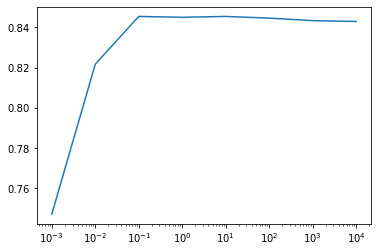

In [22]:
ax = plt.gca()
ax.plot(df.iloc[:,0].values,df.iloc[:,1].values)
ax.set_xscale('log')

0.1 Selected C

In [23]:
logreg = LogisticRegression(C=0.1,penalty='l1',max_iter=1000,solver='liblinear')
logreg.fit(X_train, y_train)
score = logreg.score(X_test, y_test)
print(score)

0.8416666666666667


In [24]:
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logreg.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":X_columns,"Coefficients":np.transpose(logreg.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

                 Variables  Coefficients
0                Intercept     -1.686126
1                      age      0.173185
2                   fnlwgt      0.062157
3            education-num      0.712239
4             capital-gain      1.799535
..                     ...           ...
86           native_Taiwan      0.000000
87         native_Thailand      0.000000
88  native_Trinadad&Tobago      0.000000
89    native_United-States      0.041003
90          native_Vietnam     -0.006300

[91 rows x 2 columns]


# Subset Selection

In [25]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
logmodel=LogisticRegression(max_iter=1000)
sbs = SFS(logmodel, 
           k_features=1, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=10)

sbs = sbs.fit(X_train, y_train)
sbs.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.0s finished

[2021-01-19 19:29:15] Features: 89/1 -- score: 0.8425[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:   36.8s finished

[2021-01-19 19:29:52] Features: 88/1 -- score: 0.8433333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:   37.5s finished

[2021-01-19 19:30:29] Features: 87/1 -- score: 0.8445833333333335[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:   23.0s finished

[2021-01-19 19:45:22] Features: 61/1 -- score: 0.8525[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:   22.7s finished

[2021-01-19 19:45:45] Features: 60/1 -- score: 0.8533333333333335[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   21.9s finished

[2021-01-19 19:46:07] Features: 59/1 -- score: 0.85375[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   10.0s finished

[2021-01-19 19:52:50] Features: 33/1 -- score: 0.85625[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    8.6s finished

[2021-01-19 19:52:59] Features: 32/1 -- score: 0.85625[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    8.1s finished

[2021-01-19 19:53:07] Features: 31/1 -- score: 0.8566666666666667[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s finished

[2021-01-19 19:54:33] Features: 5/1 -- score: 0.8345833333333333[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished

[2021-01-19 19:54:34] Features: 4/1 -- score: 0.8220833333333333[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished

[2021-01-19 19:54:34] Features: 3/1 -- score: 0.8066666666666666[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished

[2021-01-19 19:54:34] Features: 2/1 -- sc

{90: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89),
  'cv_scores': array([0.825     , 0.85416667, 0.825     , 0.84583333, 0.85833333,
         0.8375    , 0.79583333, 0.85416667, 0.86666667, 0.85      ]),
  'avg_score': 0.8412499999999999,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12',
   '13',
   '14',
   '15',
   '16',
   '17',
   

In [26]:
features = pd.DataFrame.from_dict(sbs.get_metric_dict()).T.sort_values("avg_score",ascending=False)
features

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
31,"(0, 1, 2, 3, 4, 9, 10, 13, 15, 16, 18, 19, 21,...","[0.85, 0.8583333333333333, 0.8791666666666667,...",0.856667,"(0, 1, 2, 3, 4, 9, 10, 13, 15, 16, 18, 19, 21,...",0.0129236,0.0174005,0.00580017
37,"(0, 1, 2, 3, 4, 9, 10, 13, 15, 16, 18, 19, 21,...","[0.8416666666666667, 0.8583333333333333, 0.887...",0.85625,"(0, 1, 2, 3, 4, 9, 10, 13, 15, 16, 18, 19, 21,...",0.0143325,0.0192976,0.00643252
39,"(0, 1, 2, 3, 4, 9, 10, 13, 15, 16, 18, 19, 21,...","[0.85, 0.8583333333333333, 0.8875, 0.841666666...",0.85625,"(0, 1, 2, 3, 4, 9, 10, 13, 15, 16, 18, 19, 21,...",0.0148575,0.0200043,0.00666811
33,"(0, 1, 2, 3, 4, 9, 10, 13, 15, 16, 18, 19, 21,...","[0.85, 0.8583333333333333, 0.8791666666666667,...",0.85625,"(0, 1, 2, 3, 4, 9, 10, 13, 15, 16, 18, 19, 21,...",0.013648,0.0183759,0.0061253
32,"(0, 1, 2, 3, 4, 9, 10, 13, 15, 16, 18, 19, 21,...","[0.85, 0.8583333333333333, 0.8791666666666667,...",0.85625,"(0, 1, 2, 3, 4, 9, 10, 13, 15, 16, 18, 19, 21,...",0.0127031,0.0171036,0.00570122
...,...,...,...,...,...,...,...
5,"(2, 3, 45, 47, 48)","[0.8416666666666667, 0.8375, 0.854166666666666...",0.834583,"(2, 3, 45, 47, 48)",0.0164947,0.0222088,0.00740292
4,"(2, 3, 45, 47)","[0.825, 0.8041666666666667, 0.8208333333333333...",0.822083,"(2, 3, 45, 47)",0.0177261,0.0238667,0.00795556
3,"(2, 3, 45)","[0.8, 0.7958333333333333, 0.7958333333333333, ...",0.806667,"(2, 3, 45)",0.0141273,0.0190212,0.0063404
2,"(2, 3)","[0.7791666666666667, 0.7958333333333333, 0.812...",0.793333,"(2, 3)",0.0143292,0.0192931,0.00643102


In [27]:
selected_indexes = features.iloc[0,0]

In [28]:
X_train_subset = X_train[:,selected_indexes]
X_test_subset = X_test[:,selected_indexes]
X_train_subset.shape,X_test_subset.shape

((2400, 31), (600, 31))

In [29]:
selected_columns = np.array(X.columns)[[*selected_indexes]]
selected_columns

array(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'education_11th', 'education_1st-4th', 'education_5th-6th',
       'education_9th', 'education_Assoc-acdm', 'education_Bachelors',
       'marial_Divorced', 'occupation_Exec-managerial',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'occupation_Sales', 'occupation_Tech-support',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'race_Asian-Pac-Islander',
       'native_Canada', 'native_Ecuador', 'native_Iran', 'native_Mexico'],
      dtype=object)

# See subset results

In [30]:
logreg = LogisticRegression(C=10,penalty='l2',max_iter=1000)
logreg.fit(X_train_subset, y_train)
score = logreg.score(X_test_subset, y_test)
print(score)

0.8466666666666667


In [31]:
logreg = LogisticRegression(C=0.1,penalty='l1',max_iter=1000,solver='liblinear')
logreg.fit(X_train_subset, y_train)
score = logreg.score(X_test_subset, y_test)
print(score)

0.8433333333333334


Scores are improved, Also our dataset become really smaller,so we will be using these subset from now on.

# Bundle With GridSearch

# Cross Validation on Subset Dataset (Nested)

scoring is None in gridsearch cv, which means the estimator’s score method is used.

In [72]:


params = [
    
    {'C':[0.001,0.01,0.1,1,10,100,1000,10000], 'penalty':['l1'], 'solver':['liblinear'],'max_iter':[1000]},
    
    {'C':[0.001,0.01,0.1,1,10,100,1000,10000], 'penalty':['l2'], 'solver':['lbfgs'],'max_iter':[1000]}
    
]




folds = KFold(n_splits=10, random_state=0, shuffle=True)
CV_acc = []
X_scaled_subset = X_scaled[:,selected_indexes]

for train_index,test_index in folds.split(X_scaled_subset):
    X_train, X_test = X_scaled_subset[train_index], X_scaled_subset[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    
    
    
    logreg=LogisticRegression()
    
    logreg_cv=GridSearchCV(logreg,params,cv=10)
    logreg_cv.fit(X_train,y_train)
    
    print(logreg_cv.best_params_)
    
    p = logreg_cv.best_params_
    
    logreg_opt = LogisticRegression(C=p['C'],penalty=p['penalty'],solver=p['solver'],max_iter=1000)
    logreg_opt.fit(X_train,y_train)
    
    
    CV_acc.append(logreg_opt.score(X_test,y_test))




{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
{'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
{'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
{'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
{'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
{'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
{'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
{'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
{'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [73]:
acc = pd.DataFrame(CV_acc,columns=['test_score'])
acc

,test_score
0,0.843333
1,0.830000
2,0.910000
3,0.836667
4,0.833333
5,0.860000
6,0.866667
7,0.826667
8,0.836667
9,0.826667


# C = 10 , penalty = l1, solver = 'liblinear' is selected logistic regression model

# Above cell y_train and y_test was overwritten during cross validation, so get these values again in split

# ! But as we worked on cross validation, we will be using X_train_subset, X_set_subset not X_train or X_test 

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [160]:
logreg = LogisticRegression(C=10,penalty='l1',max_iter=1000,solver='liblinear')
logreg.fit(X_train_subset, y_train)
score = logreg.score(X_test_subset, y_test)
print(score)

0.8466666666666667


Even though in nested gridsearch cv C=10, 'l1' seems best, in our train-test split its test accuracy is same with C=0.1 penalty='l2' logistic model. These two are the bests !

We are depending on nested grid-search-cv as it is more reliable. So our model params is C=10, solver = liblinear, penalty = l1

# Coefficients


In [161]:
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logreg.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":selected_columns,"Coefficients":np.transpose(logreg.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

                       Variables  Coefficients
0                      Intercept     -1.880793
1                            age      0.120248
2                         fnlwgt      0.145816
3                  education-num      0.856631
4                   capital-gain      2.460291
5                   capital-loss      0.195747
6         workclass_Self-emp-inc      0.162599
7     workclass_Self-emp-not-inc     -0.072462
8                 education_11th     -0.193614
9              education_1st-4th      0.078446
10             education_5th-6th      0.127183
11                 education_9th      0.093174
12          education_Assoc-acdm     -0.016762
13           education_Bachelors     -0.050799
14               marial_Divorced      0.213883
15    occupation_Exec-managerial      0.267785
16  occupation_Handlers-cleaners     -0.132691
17  occupation_Machine-op-inspct     -0.116920
18      occupation_Other-service     -0.348208
19     occupation_Prof-specialty      0.124733
20           

# Different Thresholds on Best Logistic Regression Model

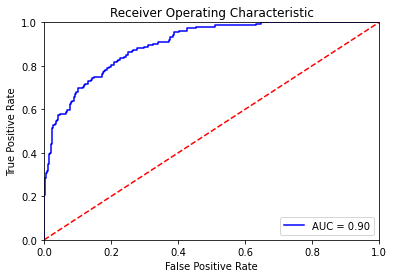

In [79]:
predicted_proba = logreg.predict_proba(X_test_subset)



fpr, tpr, threshold = roc_curve(y_test, predicted_proba[:,1])
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [80]:
from sklearn.metrics import f1_score

my_thresholds = [(x*0.1) for x in range(0,10)]
values = []

for t in my_thresholds:
    proba = logreg.predict_proba(X_test_subset)
    prediction = proba[:,1] > t
    score1 = roc_auc_score(y_test,prediction)
    score2 = f1_score(y_test,prediction)
    score3 = accuracy_score(y_test,prediction)
    values.append([t,score1,score2,score3])
    

# different metrics

In [81]:
pd.DataFrame(values,columns=['threshold','rocauc','f1','accuracy'])

,threshold,rocauc,f1,accuracy
0,0.0,0.500000,0.404255,0.253333
1,0.1,0.779488,0.612766,0.696667
2,0.2,0.800223,0.651961,0.763333
3,0.3,0.793409,0.668588,0.808333
4,0.4,0.791882,0.691030,0.845000
5,0.5,0.762570,0.661765,0.846667
6,0.6,0.746476,0.650206,0.858333
7,0.7,0.710350,0.587719,0.843333
8,0.8,0.651257,0.465347,0.820000
9,0.9,0.585526,0.292135,0.790000


# 0.2 Threshold Confusion Matrix

In [82]:
proba = logreg.predict_proba(X_test_subset)

prediction = proba[:,1] > 0.2

confusion_matrix(y_test,prediction)

array([[325, 123],
       [ 19, 133]], dtype=int64)

# 0.3 Threshold Confusion Matrix

In [83]:
proba = logreg.predict_proba(X_test_subset)

prediction = proba[:,1] > 0.3

confusion_matrix(y_test,prediction)


array([[369,  79],
       [ 36, 116]], dtype=int64)

# 0.4 Threshold Confusion Matrix

In [84]:
proba = logreg.predict_proba(X_test_subset)

prediction = proba[:,1] > 0.4

confusion_matrix(y_test,prediction)

array([[403,  45],
       [ 48, 104]], dtype=int64)

# 0.5 Threshold Confusion Matrix

In [85]:
proba = logreg.predict_proba(X_test_subset)

prediction = proba[:,1] > 0.5

confusion_matrix(y_test,prediction)

array([[418,  30],
       [ 62,  90]], dtype=int64)

# 0.6 Threshold Confusion Matrix

In [86]:
proba = logreg.predict_proba(X_test_subset)

prediction = proba[:,1] > 0.6

confusion_matrix(y_test,prediction)

array([[436,  12],
       [ 73,  79]], dtype=int64)

.

Here is the different threshold values we got. Depending on how we want our model to behave we can play around with these threshold values. For example for threshold 0.2 we are more brave about making positive prediction. As threshold increases we are more inclined to predict negative.

Metrics and their scores table is already making the interpretation. For example from table above 0.6 thresholds is best for accuracy but its f1 score is a bit low.

Choosing the proper threshold depends on our purpose. Do we want to increase our number of True  Positive or Do we care about accuracy etc. It also depends on the domain like bank credit cart example

# Initial KNN Classifier in Subset

In [87]:
knn_simple=KNeighborsClassifier(5)

knn_simple.fit(X_train_subset,y_train)

knn_simple.score(X_test_subset,y_test)


0.8233333333333334

# Nested Cross Validation

In [88]:
knn_clf=KNeighborsClassifier()

knn_neighbours = [i for i in range(3,40,2)]

params = {
  'n_neighbors':knn_neighbours
 }

params

{'n_neighbors': [3,
  5,
  7,
  9,
  11,
  13,
  15,
  17,
  19,
  21,
  23,
  25,
  27,
  29,
  31,
  33,
  35,
  37,
  39]}

In [89]:
folds = KFold(n_splits=10, random_state=0, shuffle=True)

Knn_acc = []

X_scaled_subset = X_scaled[:,selected_indexes]

for train_index,test_index in folds.split(X_scaled_subset):
    X_train, X_test = X_scaled_subset[train_index], X_scaled_subset[test_index] 
    y_train_2, y_test_2 = y[train_index], y[test_index]
    
    
    
    
    
    knn_cv=GridSearchCV(knn_clf,params,cv=10)
    knn_cv.fit(X_train,y_train_2)
    
    print(knn_cv.best_params_)
    
    p = knn_cv.best_params_
    
    knn_opt = KNeighborsClassifier(p['n_neighbors'])
    knn_opt.fit(X_train,y_train_2)
    
    
    Knn_acc.append(knn_opt.score(X_test,y_test_2))


{'n_neighbors': 9}
{'n_neighbors': 19}
{'n_neighbors': 9}
{'n_neighbors': 11}
{'n_neighbors': 11}
{'n_neighbors': 19}
{'n_neighbors': 7}
{'n_neighbors': 19}
{'n_neighbors': 17}
{'n_neighbors': 11}


In [90]:
acc = pd.DataFrame(Knn_acc,columns=['test score'])
acc

,test score
0,0.830000
1,0.816667
2,0.820000
3,0.800000
4,0.826667
5,0.823333
6,0.843333
7,0.790000
8,0.816667
9,0.793333


19 is selected that it occurs twice with good results

In [162]:
knn_clf=KNeighborsClassifier(19)

knn_clf.fit(X_train_subset,y_train)

knn_clf.score(X_test_subset,y_test)


0.835

We have done nested cross validation. Our score improved little bit on our train-test splitted test dataset

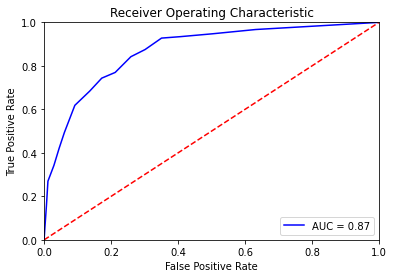

In [96]:
predicted_proba = knn_clf.predict_proba(X_test_subset)



fpr, tpr, threshold = roc_curve(y_test, predicted_proba[:,1])
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [97]:
from sklearn.metrics import f1_score

my_thresholds = [(x*0.1) for x in range(0,10)]
values = []

for t in my_thresholds:
    proba = knn_clf.predict_proba(X_test_subset)
    prediction = proba[:,1] > t
    score1 = roc_auc_score(y_test,prediction)
    score2 = f1_score(y_test,prediction)
    score3 = accuracy_score(y_test,prediction)
    
    
    values.append([t,score1,score2,score3])
    

In [98]:
pd.DataFrame(values,columns=['threshold','rocauc','f1','accuracy'])

,threshold,rocauc,f1,accuracy
0,0.0,0.667704,0.505155,0.520000
1,0.1,0.722568,0.552783,0.611667
2,0.2,0.788593,0.626667,0.720000
3,0.3,0.791588,0.646465,0.766667
4,0.4,0.785773,0.660819,0.806667
5,0.5,0.763452,0.655052,0.835000
6,0.6,0.688205,0.542373,0.820000
7,0.7,0.629288,0.414141,0.806667
8,0.8,0.528489,0.111111,0.760000
9,0.9,0.503289,0.013072,0.748333


# 0.3 Threshold Confusion Matrix

In [99]:
proba = knn_clf.predict_proba(X_test_subset)

prediction = proba[:,1] > 0.3

confusion_matrix(y_test,prediction)

array([[332, 116],
       [ 24, 128]], dtype=int64)

# 0.4 Threshold Confusion Matrix

In [100]:
proba = knn_clf.predict_proba(X_test_subset)

prediction = proba[:,1] > 0.4

confusion_matrix(y_test,prediction)

array([[371,  77],
       [ 39, 113]], dtype=int64)

# 0.5 Threshold Confusion Matrix

In [101]:
proba = knn_clf.predict_proba(X_test_subset)

prediction = proba[:,1] > 0.5

confusion_matrix(y_test,prediction)

array([[407,  41],
       [ 58,  94]], dtype=int64)

# 0.6 Threshold Confusion Matrix

In [102]:
proba = knn_clf.predict_proba(X_test_subset)

prediction = proba[:,1] > 0.6

confusion_matrix(y_test,prediction)

array([[428,  20],
       [ 88,  64]], dtype=int64)

Here is the different threshold values we got. Depending on how we want our model to behave we can play around with these threshold values. For example for threshold 0.3 we are more brave about making positive prediction. As threshold increases we are more inclined to predict negative.

Metrics and their scores table is already making the interpretation. For example from table above 0.5 thresholds is best for accuracy but its f1 score is a bit low.

Choosing the proper threshold depends on our purpose. Do we want to increase number of  True  Positive or Do we care about accuracy etc. It also depends on the domain like bank credit cart example

# Decision Tree Classifier (We use subset)

# Cross Validation on Training Set

In [56]:
cv = KFold(n_splits=10, random_state=10, shuffle=True)

CV_results = []

alpha_values = np.linspace(0,1,num=2000)

for i in alpha_values:
    for train_index, validation_index in cv.split(X_train_subset):
        X_trainp, X_valid = X_train_subset[train_index], X_train_subset[validation_index]
        y_trainp, y_valid = y_train[train_index], y_train[validation_index]
        
        
        
        classifier = DecisionTreeClassifier(random_state = 0, ccp_alpha=i)
        classifier.fit(X_trainp, y_trainp) 
        #y_pred=regressor.predict(X_valid)
        
        
        train_score = classifier.score(X_trainp,y_trainp)
        validation_score = classifier.score(X_valid,y_valid)
        
        CV_results.append([i,train_score,validation_score])
        
        


In [57]:
df = pd.DataFrame(CV_results,columns=['alpha','Training score','Validation score'])
cv_scores_by_alpha = df.groupby('alpha').mean().reset_index()
df = cv_scores_by_alpha.sort_values('Validation score',ascending=False)
df

,alpha,Training score,Validation score
5,0.002501,0.842500,0.835417
4,0.002001,0.846574,0.834583
3,0.001501,0.853889,0.832500
6,0.003002,0.839907,0.831250
7,0.003502,0.835231,0.829583
...,...,...,...
700,0.350175,0.747083,0.747083
699,0.349675,0.747083,0.747083
698,0.349175,0.747083,0.747083
697,0.348674,0.747083,0.747083


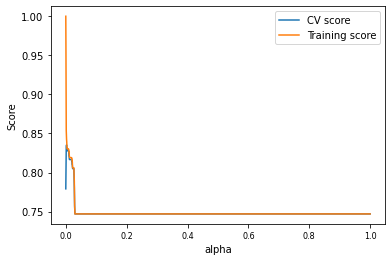

In [58]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(cv_scores_by_alpha['alpha'].values,cv_scores_by_alpha['Validation score'].values,label = 'CV score')
ax.plot(cv_scores_by_alpha['alpha'].values,cv_scores_by_alpha['Training score'].values,label = 'Training score')
ax.set_xlabel('alpha')
ax.set_ylabel('Score')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

In [59]:
classifier = DecisionTreeClassifier(random_state = 0, ccp_alpha=df.iloc[0,0])  
classifier.fit(X_train_subset, y_train) 
classifier.score(X_test_subset,y_test)

0.835

# Pruning

In [60]:
path_to_prune = classifiers.cost_complexity_pruning_path(X_train, y_train)
path_to_prune

{'ccp_alphas': array([0.        , 0.00025794, 0.00026749, 0.00027618, 0.00027736,
        0.00027778, 0.00031884, 0.00033333, 0.00033333, 0.00034226,
        0.00035714, 0.00035714, 0.00035714, 0.00036111, 0.00036458,
        0.00036458, 0.00036458, 0.00036859, 0.00037037, 0.00037037,
        0.00037054, 0.00037281, 0.000375  , 0.000375  , 0.000375  ,
        0.00037637, 0.00037879, 0.00038194, 0.0003869 , 0.0003869 ,
        0.00038889, 0.00039319, 0.00039474, 0.00039773, 0.00040541,
        0.00041432, 0.00041667, 0.00041667, 0.00041667, 0.00043223,
        0.00043478, 0.00044444, 0.00045177, 0.0004533 , 0.00047619,
        0.0005    , 0.0005    , 0.00050725, 0.00053571, 0.00053571,
        0.00053989, 0.00054451, 0.00055556, 0.00055556, 0.00055556,
        0.00055556, 0.00055556, 0.00055556, 0.00055556, 0.00055741,
        0.00056713, 0.00058681, 0.00059524, 0.00059857, 0.00060049,
        0.000607  , 0.0006074 , 0.00060847, 0.00061364, 0.00061752,
        0.00062271, 0.000625  , 0.

In [61]:
cv = KFold(n_splits=10, random_state=10, shuffle=True)

CV_results2 = []



for i in path_to_prune['ccp_alphas']:
    for train_index, validation_index in cv.split(X_train_subset):
        X_trainp, X_valid = X_train_subset[train_index], X_train_subset[validation_index]
        y_trainp, y_valid = y_train[train_index], y_train[validation_index]
        
        
        
        classifier = DecisionTreeClassifier(random_state = 0, ccp_alpha=i)
        classifier.fit(X_trainp, y_trainp) 
        #y_pred=regressor.predict(X_valid)
        
        
        train_score = classifier.score(X_trainp,y_trainp)
        validation_score = classifier.score(X_valid,y_valid)
        
        CV_results2.append([i,train_score,validation_score])
        
        


In [62]:
df2 = pd.DataFrame(CV_results2,columns=['alpha','Training score','Validation score'])
cv_scores_by_alpha = df2.groupby('alpha').mean().reset_index()
df2 = cv_scores_by_alpha.sort_values('Validation score',ascending=False)
df2

,alpha,Training score,Validation score
110,0.002177,0.844352,0.836667
112,0.002374,0.842500,0.835417
111,0.002330,0.843056,0.835417
113,0.002903,0.841157,0.834583
107,0.001999,0.846574,0.834583
...,...,...,...
4,0.000277,0.999028,0.779167
3,0.000276,0.999028,0.779167
2,0.000267,0.999306,0.779167
120,0.030931,0.747083,0.747083


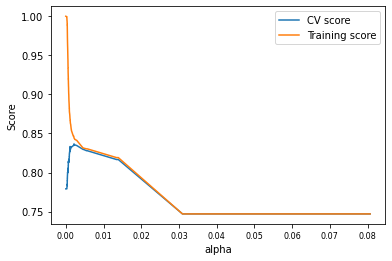

In [63]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(cv_scores_by_alpha['alpha'].values,cv_scores_by_alpha['Validation score'].values,label = 'CV score')
ax.plot(cv_scores_by_alpha['alpha'].values,cv_scores_by_alpha['Training score'].values,label = 'Training score')
ax.set_xlabel('alpha')
ax.set_ylabel('Score')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

In [64]:
classifier = DecisionTreeClassifier(random_state = 0, ccp_alpha=df2.iloc[0,0])  
classifier.fit(X_train_subset, y_train) 
classifier.score(X_test_subset,y_test)

0.835

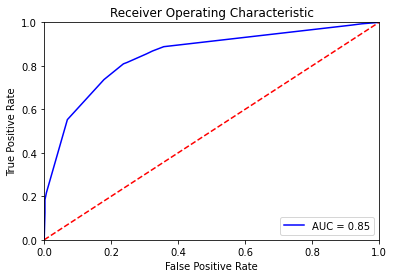

In [110]:
predicted_proba = classifier.predict_proba(X_test_subset)



fpr, tpr, threshold = roc_curve(y_test, predicted_proba[:,1])
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# 0.4 Threshold

In [69]:
proba = classifier.predict_proba(X_test_subset)

prediction = proba[:,1] > 0.4

confusion_matrix(y_test,prediction)

array([[368,  80],
       [ 40, 112]], dtype=int64)

# 0.5 Threshold

In [68]:
proba = classifier.predict_proba(X_test_subset)

prediction = proba[:,1] > 0.5

confusion_matrix(y_test,prediction)

array([[417,  31],
       [ 68,  84]], dtype=int64)

# 0.6 Threshold

In [70]:
proba = classifier.predict_proba(X_test_subset)

prediction = proba[:,1] > 0.6

confusion_matrix(y_test,prediction)

array([[417,  31],
       [ 68,  84]], dtype=int64)

# Random Forest Classifier (We use subset )

As we have seen in logistic regression and subset selection. We will use SUBSET data!!

In [73]:
clf=RandomForestClassifier(random_state=0, n_estimators = 100,oob_score=True)

clf.fit(X_train_subset,y_train)


print(f"score : {clf.score(X_test_subset,y_test)}, oob score : {clf.oob_score_}")

score : 0.82, oob score : 0.8208333333333333


In [74]:
y_pred = clf.predict(X_test_subset)

confusion_matrix(y_test,y_pred)

array([[409,  39],
       [ 69,  83]], dtype=int64)

In [75]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred)

0.729499530075188

# Grid Search on Random Forrest

In [81]:
clf=RandomForestClassifier(random_state=0)
# number of trees in random forest
n_estimators = [400,500,600]
# number of features at every split
max_features = [i for i in range(1,X_train_subset.shape[1]+1,2)]
alpha_values = np.linspace(0,0.1,num=50)

# create grid
params = {
 'n_estimators': n_estimators,
 'max_features': max_features,
  #'ccp_alpha':alpha_values will be tested later as it creates to many combinations  
 }
params

{'n_estimators': [400, 500, 600],
 'max_features': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]}

As our dataset is unbalanced multiclass dataset, we have selected roc_auc scoring in gridsearchcv

In [82]:
# Grid search of parameters
clf_grid = GridSearchCV(estimator = clf, param_grid = params,
                                cv = 10, verbose=2, scoring='roc_auc',n_jobs = -1)
# Fit the model
clf_grid.fit(X_train_subset, y_train)
# print results
print(clf_grid.best_params_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  6.0min finished


{'max_features': 7, 'n_estimators': 400}


In [83]:
clf=RandomForestClassifier(random_state=0, n_estimators = 400, max_features=7,oob_score=True)

clf.fit(X_train_subset,y_train)


print(f"score : {clf.score(X_test_subset,y_test)}, oob score : {clf.oob_score_}")

score : 0.8233333333333334, oob score : 0.83125


# ccp_alpha parameter test

In [89]:
alpha_scores = []
for a in alpha_values:
    clf=RandomForestClassifier(random_state=0, n_estimators = 400, max_features=7,oob_score=True,ccp_alpha =  a)
    cv_value = cross_val_score(clf,X_train_subset,y_train,scoring='roc_auc',cv=10)
    alpha_scores.append((a,cv_value.mean()))
    

In [96]:
pd_alpha = pd.DataFrame(alpha_scores,columns = ['alpha','cvscore']).sort_values(by = 'cvscore',ascending=False)
pd_alpha[0:10]

,alpha,cvscore
1,0.002041,0.895947
2,0.004082,0.889625
3,0.006122,0.886146
4,0.008163,0.882720
0,0.000000,0.881134
5,0.010204,0.880174
6,0.012245,0.878036
7,0.014286,0.876227
8,0.016327,0.874143
9,0.018367,0.873175


In [113]:
clf=RandomForestClassifier(random_state=0, n_estimators = 400, max_features=7,oob_score=True,ccp_alpha=0.002041)

clf.fit(X_train_subset,y_train)


print(f"score : {clf.score(X_test_subset,y_test)}, oob score : {clf.oob_score_}")

score : 0.8433333333333334, oob score : 0.8383333333333334


alpha adjustments has improved both test scores and oob scores.We could add it as a parameter in gridsearch but num of combination might cause 5+ hours processing so we have used such a method as we had to

# Feature Importances of Random Forrest

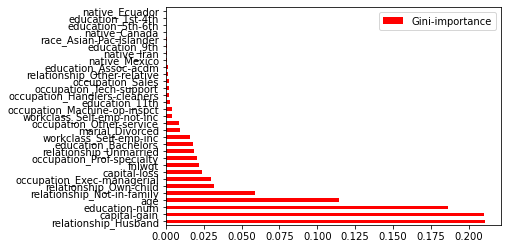

In [98]:
# Plot the impurity-based feature importances of the forest
feats = {} # a dict to hold feature_name: feature_importance
importances = clf.feature_importances_
for feature, importance in zip(selected_columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance',ascending=False)
importances.plot.barh(color='r')

In [99]:
importances

,Gini-importance
relationship_Husband,0.210438
capital-gain,0.210220
education-num,0.186101
age,0.114345
relationship_Not-in-family,0.058647
relationship_Own-child,0.031698
occupation_Exec-managerial,0.030140
capital-loss,0.023698
fnlwgt,0.021663
occupation_Prof-specialty,0.020854


list of feature importances for random forrest. fnlwgt, age, edicationul num seems most import variables

In [100]:
y_pred = clf.predict(X_test_subset)

confusion_matrix(y_test,y_pred)

array([[425,  23],
       [ 71,  81]], dtype=int64)

In [101]:
roc_auc_score(y_test,y_pred)

0.7407777255639099

# In cross validation we increased oob score, roc_auc score and accuracy score

# Roc - Auc curve

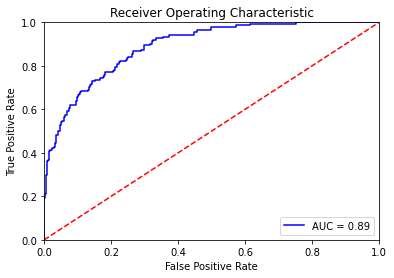

In [102]:
predicted_proba = clf.predict_proba(X_test_subset)



fpr, tpr, threshold = roc_curve(y_test, predicted_proba[:,1])
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Note : roc_auc_score 'In the binary case, you can either provide the probability estimates, using the classifier.predict_proba() method, or the non-thresholded decision values given by the classifier.decision_function() method.' (sklearn documentation)

.

# Test Different Thresholds

In [103]:
clf

RandomForestClassifier(ccp_alpha=0.002041, max_features=7, n_estimators=400,
                       oob_score=True, random_state=0)

In [104]:
from sklearn.metrics import f1_score

my_thresholds = [(x*0.1) for x in range(0,10)]
values = []

for t in my_thresholds:
    proba = clf.predict_proba(X_test_subset)
    prediction = proba[:,1] > t
    score1 = roc_auc_score(y_test,prediction)
    score2 = f1_score(y_test,prediction)
    score3 = accuracy_score(y_test,prediction)
    
    
    values.append([t,score1,score2,score3])
    

In [105]:
pd.DataFrame(values,columns=['threshold','rocauc','f1','accuracy'])

,threshold,rocauc,f1,accuracy
0,0.0,0.500000,0.404255,0.253333
1,0.1,0.751527,0.581162,0.651667
2,0.2,0.790179,0.637890,0.748333
3,0.3,0.786537,0.652055,0.788333
4,0.4,0.779840,0.675676,0.840000
5,0.5,0.740778,0.632813,0.843333
6,0.6,0.696076,0.560000,0.835000
7,0.7,0.622768,0.395833,0.806667
8,0.8,0.585526,0.292135,0.790000
9,0.9,0.516447,0.063694,0.755000


# For threshold 0.3

In [106]:
proba = clf.predict_proba(X_test_subset)

prediction = proba[:,1] > 0.3

confusion_matrix(y_test,prediction)

array([[354,  94],
       [ 33, 119]], dtype=int64)

# For Threshold 0.4

In [107]:
proba = clf.predict_proba(X_test_subset)

prediction = proba[:,1] > 0.4

confusion_matrix(y_test,prediction)

array([[404,  44],
       [ 52, 100]], dtype=int64)

# For Threshold 0.5

In [108]:
proba = clf.predict_proba(X_test_subset)

prediction = proba[:,1] > 0.5

confusion_matrix(y_test,prediction)

array([[425,  23],
       [ 71,  81]], dtype=int64)

# For Threshold 0.6

In [109]:
proba = clf.predict_proba(X_test_subset)

prediction = proba[:,1] > 0.6

confusion_matrix(y_test,prediction)

array([[438,  10],
       [ 89,  63]], dtype=int64)

Here is the different threshold values we got. Depending on how we want our model to behave we can play around with these threshold values. For example for threshold 0.3 we are more brave about making positive prediction. As threshold increases we are more inclined to predict negative.

Metrics and their scores are already making the interpretation. Choosing the proper threshold depends on our purpose. Do we want to increase num of our True  Positive or Do we care about accuracy etc. It also depends on the domain like bank credit cart example